<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleH_Section_22_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 22: Ordinary Differential Equation - Initial Value Problems**

# *22.1 ODE Initial Value Problem Statement*

A differential equation is an equation that gives a relationship between a function f(x), its derivatives, and its independent variable x. A differential equation is ordinary is the independent variable is in one dimension, and the order of a differential equation is given by the highest order of a derivative of the function f(x) that appears in the equation. For example,

In [ ]:
# d^2f(x)/dx^2 = -f(x)

is a second-order ordinary differential equation. With all this in mind, we can consider the problem statement for initial value problems: given an ordinary differential equation involving f(x), and its inital values (values at x=0 for f(x) and all its derivatives), we want to find a unique solution.

# *22.2 Reduction of Order*

In order to approach the ODE initial value problem outlined above, one frequent method used is reduction of order. In this method, we essentially rewrite the nth-order ordinary differential equation as a system of coupled first-order ordinary differential equations. To do this, we will often consider the state S(x):

In [ ]:
# S(x) = [f(x) \\ f'(x) \\ f''(x) \\ ...] = [S_1(x) \\ S_2(x) \\ S_3(x) \\ ...]
# S'(x) = [f'(x) \\ f''(x) \\ f'''(x) \\ ...] = [S_2(x) \\ S_3(x) \\ S_4(x) \\ ...]

As we can see here, we end up with an equation of S'(x) in terms of S_i(x): a first-order differential equation. As an example, let's consider a population model for rabits r(t) and wolves w(t):

In [ ]:
# r'(t) = 2r(t) - w(t)
# w'(t) = r(t) + w(t)

We can then write our state S(t) as

In [ ]:
# S(t) = [r(t) \\ w(t)]

and taking the derivative of our state then gives us

In [ ]:
# S'(t) = [r'(t) \\ w'(t)] = [2r(t) - w(t) \\ r(t) + w(t)] = [2 & -1 \\ 1 & 1]S(t)

a coupled first-order differential equation. Next, let's consider some methods to approach solving this reduced-order system.

# *22.3 The Euler Method*

One of the simplest solution methods for the first-order ODE system is Euler's Method. In this method, we consider the ODE S'(t) = F[t, S(t)], and we discretize t with spacing h. Given the initial values, we can then define each 'step' forward for the solution with the explicit Euler formula:

In [ ]:
# S(t_{i+1}) = S(t_i) + h * F[t_i, S(t_i)]

This method is explicit because each step t_{i+1} relies only on information from the previous step t_i. Let's apply this method to the following initial value problem: f'(t) = e^t, f(0) = 1. This problem has the explicit solution f(t) = e^t, so let's compare with our explicit Euler solution:

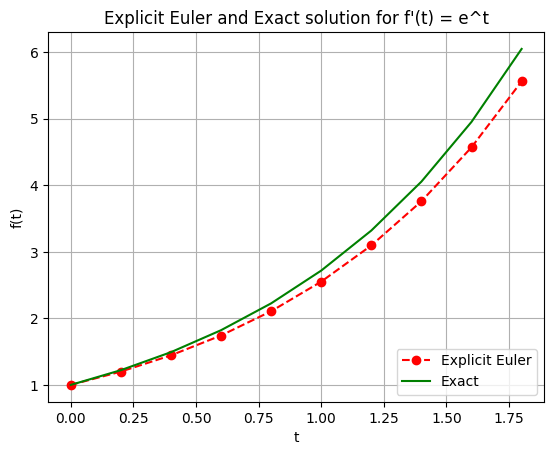

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

f = lambda t, s: np.exp(t)
h = 0.2
t = np.arange(0, 2, h)
s0 = 1

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.plot(t, s, 'ro--', label='Explicit Euler')
plt.plot(t, np.exp(t), 'g', label='Exact')
plt.title('Explicit Euler and Exact solution for f\'(t) = e^t')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

With the step size of h=0.2, we can see that our approximate solution quickly falls off. With a smaller step size, this issue could be addressed. Alternativelly, we could also employ an implicit variation on this method; implicit because the next step t_{i+1} doesn't solely rely on information from the previous t_i.

The first implicit method to consider is the implicit Euler method, given by:

In [ ]:
# S(t_{i+1}) = S(t_i) + h * F[t_{i+1}, S(t_{i+1})]

The implicit Euler method is not universally applicable, but we frequently find that we are able to apply it in some situations. The next implicit method is a simple average of the explicit and implicit Euler methods, the trapezoidal formula, given by:

In [ ]:
# S(t_{i+1}) = S(t_i) + (h/2) * (F[t_i, S(t_i)] + F[t_{i+1}, S(t_{i+1})])

These implicit methods are less far-reaching in their applicability, but will often provide a more accurate solution for the situations in which they do apply than the explicit Euler method. 

Next up, we will consider the stability of these solution methods, as well as some more complicated methods that will provide us with a safer and more accurate solution.